# Author: Alejandro C Parra García

In [1]:
import numpy as np
import pandas as pd
from tensorflow import random
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)
random.set_seed(1)

In [2]:
#The original txt file has been modified, to delete the consecutives duplicates ‘\t’
path="https://github.com/The-Katz-School-at-Yeshiva-University/Neural.Networks.-.Deep.Learn/blob/main/Mini%20Project%201/data/seeds_dataset.txt?raw=true"
#Import the data and create the Columns Names
df = pd.read_csv(path, sep="\t", header=None)
df.columns = ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','class']
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# now, we normalize the data. Using the Min max Scaler, from sklearn

minmax=MinMaxScaler()
p_minmax=minmax.fit_transform(df[['area','perimeter','compactness','length_of_kernel',
                                               'width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']])
df_minmax = pd.DataFrame(p_minmax)
df['area']=df_minmax[0]
df['perimeter']=df_minmax[1]
df['compactness']=df_minmax[2]
df['length_of_kernel']=df_minmax[3]
df['width_of_kernel']=df_minmax[4]
df['asymmetry_coefficient']=df_minmax[5]
df['length_of_kernel_groove']=df_minmax[6]

# Split DATA into Train and Test


In [4]:
#Sufle the data
df_copy = df.sample(frac=1,random_state=1).reset_index(drop=True)

#Split Training - Test
df_train=df_copy[:150]
df_test=df_copy[150:].reset_index(drop=True)

#Create x and y df
x_train = df_train.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_train = df_train.loc[:, ['class']].copy()
x_test = df_test.loc[:, ['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']].copy()
df_y_test = df_test.loc[:, ['class']].copy()

In [5]:
def get_y(df_y):
    ret=[]
    leng=df_y.shape[0]
    for i in range(leng):
        e=df_y['class'].iloc[i]
        if(e == 1):
            ret.append([1,0,0])
        elif(e == 2):
            ret.append([0,1,0])
        else:
            ret.append([0,0,1])
    return ret

In [6]:
y_train=get_y(df_y_train)
y_test=get_y(df_y_test)

In [7]:
print(x_train.shape)
print(len(y_train))

(150, 7)
150


In [8]:
print(x_test.shape)
print(len(y_test))

(60, 7)
60


# Build Model

In [9]:
model = Sequential()

model.add(Dense(units = 10, activation='relu', input_dim= (x_train.shape[1]) ))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 3, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 21        
Total params: 425
Trainable params: 425
Non-trainable params: 0
__________________________________________________________

Use the Relu activation function since is faster to train than the tanh for the hidden layers, according to the book. 
For the output layer also use the Sigmoid activation function since we are trying to predict a class, so the sigmoid return a value from 0 to 1. That’s perfect for what we need for a class.

The idea of the architecture is to compress the information to try to predict a Class. Thus, the number of nodes in each layer get reduced the deeper the neural network gets. 
10-10-8-8-6-4-3

The loss function is set categorical_crossentropy, since we are trying to predict a Class of 3 different values

According to the book page 105, Adam outperforms SGD. So, I’m going to use Adam


# Fit model

In [10]:
history = model.fit(x_train.to_numpy(), np.array(y_train), epochs=200, verbose=1)

Epoch 1/200
5/5 [==============================] - 0s 996us/step - loss: 1.0743 - accuracy: 0.3067
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.9098 - accuracy: 0.5800
Epoch 3/200
5/5 [==============================] - 0s 970us/step - loss: 0.8257 - accuracy: 0.6867
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7685 - accuracy: 0.6933
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7333
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7933
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.8000
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8533
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8533
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8600
Epoch 11/200
5/5 [=======

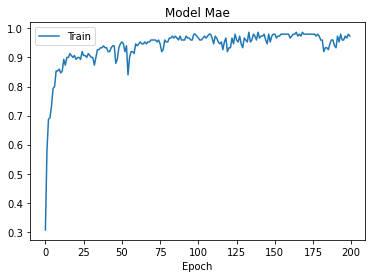

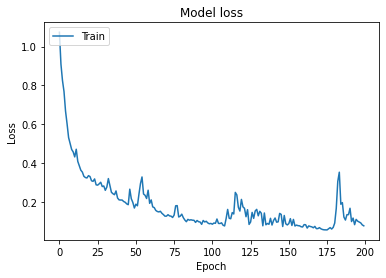

In [11]:
# Code adapted from the book, page 109
# Plot training MAE values
plt.plot(history.history['accuracy'])
plt.title('Model Mae')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Predict

In [12]:
y_predicted = model.predict(x_test)

In [13]:
def collapse_Pred(pred):
    pos=-1
    it=0
    max_v=0
    for x in pred:
        if(x>max_v):
            max_v=x
            pos=it
        it+=1
    res=[0 for y in range(len(pred))] 
    res[pos]=1
    return (res,(pos+1))

In [14]:
y_predicted_coll=[]
clas=[]
for i in y_predicted:
    y_predicted_coll.append(collapse_Pred(i)[0])
    clas.append(collapse_Pred(i)[1])

In [15]:
df_f=pd.DataFrame(y_test, columns = ['Real_1','Real_2','Real_3'])

df_f2=pd.DataFrame(y_predicted, columns = ['Predicted_1','Predicted_2','Predicted_3'])
df_f["Predicted_1"]=df_f2["Predicted_1"]
df_f["Predicted_2"]=df_f2["Predicted_2"]
df_f["Predicted_3"]=df_f2["Predicted_3"]

df_f3=pd.DataFrame(y_predicted_coll, columns = ['Predicted_Col_1','Predicted_Col_2','Predicted_Col_3'])
df_f["Predicted_Col_1"]=df_f3["Predicted_Col_1"]
df_f["Predicted_Col_2"]=df_f3["Predicted_Col_2"]
df_f["Predicted_Col_3"]=df_f3["Predicted_Col_3"]
df_f["Real_Class"]=df_y_test
df_f["Predicted_Class"]=clas

In [16]:
df_f

,Real_1,Real_2,Real_3,Predicted_1,Predicted_2,Predicted_3,Predicted_Col_1,Predicted_Col_2,Predicted_Col_3,Real_Class,Predicted_Class
0,0,1,0,1.911372e-03,4.384775e-05,6.210680e-09,1,0,0,2,1
1,0,1,0,0.000000e+00,3.467229e-13,0.000000e+00,0,1,0,2,2
2,0,0,1,9.427339e-03,6.264318e-05,2.226797e-02,0,0,1,3,3
3,1,0,0,3.248811e-03,4.935533e-05,9.341544e-07,1,0,0,1,1
4,1,0,0,1.398295e-03,4.089789e-05,3.247674e-10,1,0,0,1,1
5,1,0,0,5.744576e-03,5.605956e-05,2.060831e-04,1,0,0,1,1
6,0,0,1,1.543200e-02,6.999751e-05,7.153025e-01,0,0,1,3,3
7,0,1,0,4.464599e-19,1.458294e-08,0.000000e+00,0,1,0,2,2
8,0,1,0,4.192723e-21,5.161636e-09,0.000000e+00,0,1,0,2,2
9,1,0,0,1.359373e-03,4.064069e-05,2.485883e-10,1,0,0,1,1


In [17]:
def conf_matrix(df_f):
    confusion_matrix=[[0,0,0],
              [0,0,0],
              [0,0,0]]
    for index, row in df_f.iterrows():
        confusion_matrix[ int(row["Real_Class"]-1) ][ int(row["Predicted_Class"]-1) ]+=1 # With the Real and Predicted Class, we update the Confusion Matrix
    return confusion_matrix
# Calculate the Accuracy
def accuracy(confusion_mat):
    correct=confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[2][2]
    total=0
    for i in confusion_mat:
        for j in i:
            total+=j
    return correct/total

# Calculate the Precision fo n_class
def precision(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_false_positives=confusion_mat[0][n_class]+confusion_mat[1][n_class]+confusion_mat[2][n_class]
    return true_positives/true_false_positives

# Calculate the Recall fo n_class
def recall(confusion_mat,n_class):
    true_positives=confusion_mat[n_class][n_class]
    true_pos_false_neg=confusion_mat[n_class][0]+confusion_mat[n_class][1]+confusion_mat[n_class][2]
    return true_positives/true_pos_false_neg


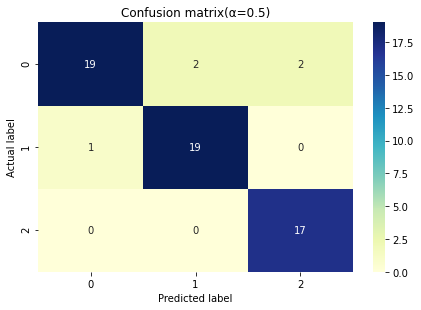

In [18]:
#confusion_matrix
confusion_matrix=conf_matrix(df_f)

fig, ax = plt.subplots()
# create heatmap

# High Learning Rate (α=0.5)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix(α=0.5)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:

print("Accuracy: ",accuracy(confusion_matrix))
print("\t\tPrecision\t\tRecall")
print("\t0:  "+str(precision(confusion_matrix,0))+"\t\t   "+str(recall(confusion_matrix,0)))
print("\t1:  "+str(precision(confusion_matrix,1))+"\t   "+str(recall(confusion_matrix,1)))
print("\t2:  "+str(precision(confusion_matrix,2))+"\t   "+str(recall(confusion_matrix,2)))

Accuracy:  0.9166666666666666
		Precision		Recall
	0:  0.95		   0.8260869565217391
	1:  0.9047619047619048	   0.95
	2:  0.8947368421052632	   1.0


We can also see that the model using keras achieve a higher accuracy than in the Mini Project 1 and in the Mini project 2.
In the case of the Mini project 2: 
For the different Learning Rates, Keras got a better accuracy of 0.916 compare with the 0.9 accuracy of the learning rates 0.05 and 0.01 
For nº of nodes in the hidden layer we find the same results. Keras is better
For the activation function, we see that Keras keeps winning.
